In [105]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

#cargar datos
df = pd.read_csv('/kaggle/input/udea-ai-4-eng-20251-pruebas-saber-pro-colombia/train.csv')

#mostrar datos
df.head()


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [108]:

#mostrar filas y columnas
print(df.shape)
#mostrar informacion detallada tipos de datos 
df.info()

(692500, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              692500 non-null  int64  
 1   PERIODO                         692500 non-null  int64  
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object 
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object 
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object 
 7   FAMI_TIENEINTERNET              665871 non-null  object 
 8   FAMI_EDUCACIONPADRE             669322 non-null  object 
 9   FAMI_TIENELAVADORA              652727 non-null  object 
 10  FAMI_TIENEAUTOMOVIL             648877 non-null  object 
 11  ESTU_PRIVADO_LIBERTAD           692500 non-null  object 
 12  EST

In [109]:
# listar y mostrar columnas sin eliminar
columnas = df.columns
columnas_lista = df.columns.tolist()
print(columnas_lista)

['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD', 'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET.1', 'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL', 'coef_1', 'coef_2', 'coef_3', 'coef_4']


In [110]:
#Eliminar columnas irrelevantes
df.drop(columns=["ID", "FAMI_TIENEINTERNET.1", "ESTU_PRIVADO_LIBERTAD", "PERIODO"], errors='ignore', inplace=True)



In [111]:
# listar y mostrar columnas luego que se elimina
columnas = df.columns
columnas_lista = df.columns.tolist()
print(columnas_lista)

['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR', 'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL', 'coef_1', 'coef_2', 'coef_3', 'coef_4']


In [112]:
#separar variable objetivo
target = 'RENDIMIENTO_GLOBAL'
X = df.drop(columns=[target])
y = df[target]

In [113]:
#Separar columnas por tipos de datos
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Número de columnas categóricas: {len(categorical_cols)}")
print("\nColumnas categóricas:")
print(categorical_cols)
print("\n")
print(f"Número de columnas numéricas: {len(numerical_cols)}")
print("\nColumnas numéricas:")
print(numerical_cols)



['coef_1', 'coef_2', 'coef_3', 'coef_4']


In [114]:
#Cantidad de valores nulos
df.isnull().sum()


ESTU_PRGM_ACADEMICO                   0
ESTU_PRGM_DEPARTAMENTO                0
ESTU_VALORMATRICULAUNIVERSIDAD     6287
ESTU_HORASSEMANATRABAJA           30857
FAMI_ESTRATOVIVIENDA              32137
FAMI_TIENEINTERNET                26629
FAMI_EDUCACIONPADRE               23178
FAMI_TIENELAVADORA                39773
FAMI_TIENEAUTOMOVIL               43623
ESTU_PAGOMATRICULAPROPIO           6498
FAMI_TIENECOMPUTADOR              38103
FAMI_EDUCACIONMADRE               23664
RENDIMIENTO_GLOBAL                    0
coef_1                                0
coef_2                                0
coef_3                                0
coef_4                                0
dtype: int64

<Axes: title={'center': 'Columnas con valores nulos'}>

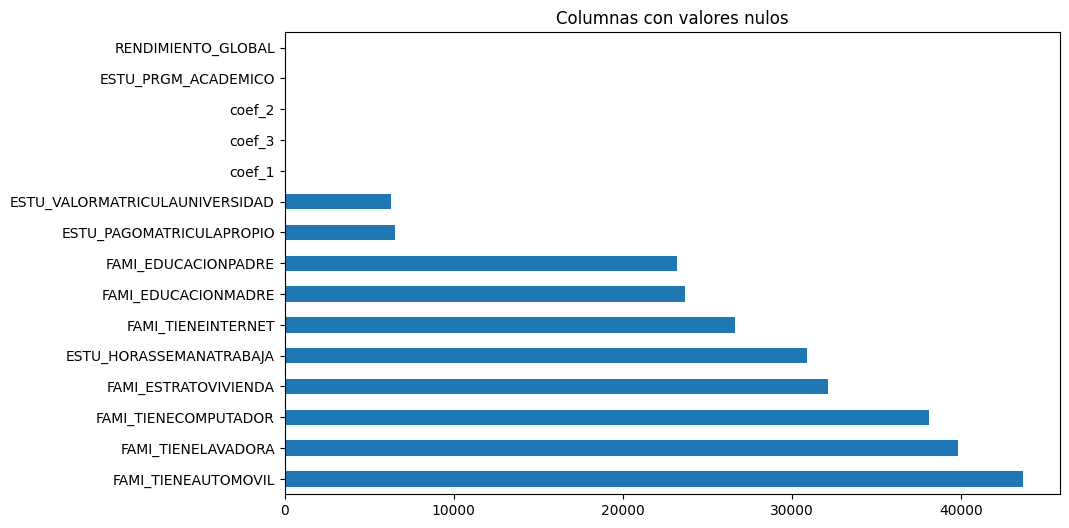

In [115]:
df.isnull().sum().sort_values(ascending=False).head(15).plot(kind='barh', figsize=(10,6), title="Columnas con valores nulos")

In [116]:
#Imputar valores nulos

#cambia columnas numericas por la mediana 
num_imputer = SimpleImputer(strategy='median')
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])
#cambia columnas categoricas por la moda 
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

print(df.isnull().sum())

ESTU_PRGM_ACADEMICO               0
ESTU_PRGM_DEPARTAMENTO            0
ESTU_VALORMATRICULAUNIVERSIDAD    0
ESTU_HORASSEMANATRABAJA           0
FAMI_ESTRATOVIVIENDA              0
FAMI_TIENEINTERNET                0
FAMI_EDUCACIONPADRE               0
FAMI_TIENELAVADORA                0
FAMI_TIENEAUTOMOVIL               0
ESTU_PAGOMATRICULAPROPIO          0
FAMI_TIENECOMPUTADOR              0
FAMI_EDUCACIONMADRE               0
RENDIMIENTO_GLOBAL                0
coef_1                            0
coef_2                            0
coef_3                            0
coef_4                            0
dtype: int64


In [117]:
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Número de columnas categóricas: {len(categorical_cols)}")
print("\nColumnas categóricas:")
print(categorical_cols)
print("\n")
print(f"Número de columnas numéricas: {len(numerical_cols)}")
print("\nColumnas numéricas:")
print(numerical_cols)

Número de columnas categóricas: 12

Columnas categóricas:
['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR', 'FAMI_EDUCACIONMADRE']


Número de columnas numéricas: 4

Columnas numéricas:
['coef_1', 'coef_2', 'coef_3', 'coef_4']


In [118]:
df[numerical_cols].describe()

,coef_1,coef_2,coef_3,coef_4
count,692500.000000,692500.000000,692500.000000,692500.000000
mean,0.268629,0.259996,0.262087,0.262903
std,0.122130,0.093480,0.058862,0.067944
min,0.000000,0.000000,0.000000,0.000000
25%,0.203000,0.212000,0.254000,0.255000
50%,0.240000,0.271000,0.276000,0.285000
75%,0.314000,0.309000,0.293000,0.303000
max,0.657000,0.487000,0.320000,0.332000


In [120]:
# Numérico: imputar + escalar
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

# Categórico: imputar + one-hot
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [121]:
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

X_processed = preprocessor.fit_transform(X)
X_df[num_features].describe()

,coef_1,coef_2,coef_3,coef_4
count,692500.000000,692500.000000,692500.000000,692500.000000
mean,0.408872,0.533872,0.819023,0.791877
std,0.185890,0.191951,0.183945,0.204650
min,0.000000,0.000000,0.000000,0.000000
25%,0.308980,0.435318,0.793750,0.768072
50%,0.365297,0.556468,0.862500,0.858434
75%,0.477930,0.634497,0.915625,0.912651
max,1.000000,1.000000,1.000000,1.000000


In [122]:
cat_features = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)
num_features = numerical_cols
all_features = list(num_features) + list(cat_features)


In [123]:

X_df = pd.DataFrame(
    X_processed.toarray() if hasattr(X_processed, 'toarray') else X_processed,
    columns=all_features
)

# --- Visualizar tabla normalizada completa ---
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

X_df.head() 

,coef_1,coef_2,coef_3,coef_4,ESTU_PRGM_ACADEMICO_3° CICLO PROFESIONAL NEGOCIOS INTERNACIONALES,ESTU_PRGM_ACADEMICO_ACTIVIDAD FISICA Y DEPORTE,ESTU_PRGM_ACADEMICO_ACUICULTURA,ESTU_PRGM_ACADEMICO_ADMINISTRACION,ESTU_PRGM_ACADEMICO_ADMINISTRACION FINANCIERA,ESTU_PRGM_ACADEMICO_ADMINISTRACION & SERVICIO,ESTU_PRGM_ACADEMICO_ADMINISTRACION AERONAUTICA,ESTU_PRGM_ACADEMICO_ADMINISTRACION AGROPECUARIA,ESTU_PRGM_ACADEMICO_ADMINISTRACION AMBIENTAL,ESTU_PRGM_ACADEMICO_ADMINISTRACION AMBIENTAL Y DE LOS RECURSOS NATURALES,ESTU_PRGM_ACADEMICO_ADMINISTRACION BANCARIA Y FINANCIERA,ESTU_PRGM_ACADEMICO_ADMINISTRACION COMERCIAL,ESTU_PRGM_ACADEMICO_ADMINISTRACION COMERCIAL Y DE MERCADEO,ESTU_PRGM_ACADEMICO_ADMINISTRACION DE COMERCIO EXTERIOR,ESTU_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS,ESTU_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS Y GESTION AMBIENTAL,ESTU_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS AGROINDUSTRIALES,ESTU_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS AGROPECUARIAS,ESTU_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS COMERCIALES,ESTU_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS EN TELECOMUNICACIONES,ESTU_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS TURISTICA,ESTU_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS TURISTICAS,ESTU_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS TURISTICAS Y HOTELERAS,ESTU_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS TURÍSTICAS Y HOTELERAS,ESTU_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS Y FINANZAS,ESTU_PRGM_ACADEMICO_ADMINISTRACION DE GESTISN HUMANA,ESTU_PRGM_ACADEMICO_ADMINISTRACION DE HOTELERIA Y TURISMO,ESTU_PRGM_ACADEMICO_ADMINISTRACION DE INSTITUCIONES DE SERVICIO,ESTU_PRGM_ACADEMICO_ADMINISTRACION DE LA CALIDAD,ESTU_PRGM_ACADEMICO_ADMINISTRACION DE LA SEGURIDAD SOCIAL,ESTU_PRGM_ACADEMICO_ADMINISTRACION DE LA SEGURIDAD Y SALUD OCUPACIONAL,ESTU_PRGM_ACADEMICO_ADMINISTRACION DE MERCADEO,ESTU_PRGM_ACADEMICO_ADMINISTRACION DE MERCADEO Y LOGISTICA INTERNACIONALES,ESTU_PRGM_ACADEMICO_ADMINISTRACION DE NEGOCIOS,ESTU_PRGM_ACADEMICO_ADMINISTRACION DE NEGOCIOS INTERNACIONALES,ESTU_PRGM_ACADEMICO_ADMINISTRACION DE SERVICIOS DE SALUD,ESTU_PRGM_ACADEMICO_ADMINISTRACION DE SISTEMAS,ESTU_PRGM_ACADEMICO_ADMINISTRACION DE SISTEMAS INFORMATICOS,ESTU_PRGM_ACADEMICO_ADMINISTRACION DE SISTEMAS INFORMÁTICOS,ESTU_PRGM_ACADEMICO_ADMINISTRACION DEL COMERCIO INTERNACIONAL,ESTU_PRGM_ACADEMICO_ADMINISTRACION DEL MEDIO AMBIENTE,ESTU_PRGM_ACADEMICO_ADMINISTRACION DEL TURISMO SOSTENIBLE,ESTU_PRGM_ACADEMICO_ADMINISTRACION DEPORTIVA,ESTU_PRGM_ACADEMICO_ADMINISTRACION EMPRESAS AGROINDUSTRIALES,ESTU_PRGM_ACADEMICO_ADMINISTRACION EN FINANZAS Y NEGOCIOS INTERNACIONALES,ESTU_PRGM_ACADEMICO_ADMINISTRACION EN LOGISTICA Y PRODUCCION,ESTU_PRGM_ACADEMICO_ADMINISTRACION EN MERCADEO Y LOGISTICA INTERNACIONALES,ESTU_PRGM_ACADEMICO_ADMINISTRACION EN NEGOCIOS INTERNACIONALES,ESTU_PRGM_ACADEMICO_ADMINISTRACION EN SALUD,ESTU_PRGM_ACADEMICO_ADMINISTRACION EN SALUD: ENFASIS EN GESTION DE SERVICIOS DE SALUD Y ENFASIS EN GESTION SANITARIA Y AMBIENTAL,ESTU_PRGM_ACADEMICO_ADMINISTRACION FINANCIERA,ESTU_PRGM_ACADEMICO_ADMINISTRACION FINANCIERA Y DE SISTEMAS,ESTU_PRGM_ACADEMICO_ADMINISTRACION HUMANA,ESTU_PRGM_ACADEMICO_ADMINISTRACION INDUSTRIAL,ESTU_PRGM_ACADEMICO_ADMINISTRACION INFORMATICA,ESTU_PRGM_ACADEMICO_ADMINISTRACION INFORMÁTICA,ESTU_PRGM_ACADEMICO_ADMINISTRACION LOGISTICA,ESTU_PRGM_ACADEMICO_ADMINISTRACION MARITIMA,ESTU_PRGM_ACADEMICO_ADMINISTRACION MARITIMA Y FLUVIAL,ESTU_PRGM_ACADEMICO_ADMINISTRACION MARITIMA Y PORTUARIA,ESTU_PRGM_ACADEMICO_ADMINISTRACION POLICIAL,ESTU_PRGM_ACADEMICO_ADMINISTRACION PUBLICA,ESTU_PRGM_ACADEMICO_ADMINISTRACION PUBLICA TERRITORIAL,ESTU_PRGM_ACADEMICO_ADMINISTRACION TECNOLOGICA,ESTU_PRGM_ACADEMICO_ADMINISTRACION TURISTICA,ESTU_PRGM_ACADEMICO_ADMINISTRACION TURISTICA Y HOTELERA,ESTU_PRGM_ACADEMICO_ADMINISTRACION TURÍSTICA,ESTU_PRGM_ACADEMICO_ADMINISTRACION Y DIRECCION DE EMPRESAS,ESTU_PRGM_ACADEMICO_ADMINISTRACION Y FINANZAS,ESTU_PRGM_ACADEMICO_ADMINISTRACION Y GESTION AMBIENTAL,ESTU_PRGM_ACADEMICO_ADMINISTRACION Y NEGOCIOS INTERNACIONALES,ESTU_PRGM_